In [72]:
import numpy as np
import os
from netrep.metrics import LinearMetric
from netrep.metrics import GaussianStochasticMetric
from matplotlib.ticker import FormatStrFormatter
import matplotlib.pyplot as plt
import seaborn as sns
import json, math
from scipy import stats

# Direction-selective units

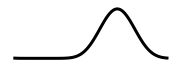

In [37]:
import torch
net_size = 100
def _o_spikes(pref, stim, exponent, max_spike, k):
    # o_spikes: spike numbers per trial for direction tuning cells
    # r = o_spikes(pref, stim, exponent, k)
    # pref: row vec for cells' preferred directions
    # stim: column vec for stimulus directions
    # exponent: scalar determining the widths of tuning. larger value for sharper tuning
    # maxSpike: scalar for mean max spike number when pref = stim
    # k: scalar for determining variance = k * mean
    # spikes: different columuns for cells with different pref orintations
    #         different rows for different stim directions
    np_ = pref.shape[0]  # number of elements in pref
    ns = stim.shape[0]  # number of elements in stim
    prefs = torch.ones((ns, 1)) @ pref[None, :]  # ns x np array, (ns x 1) @ (1 x np)
    stims = stim[:, None] @ torch.ones((1, np_))  # ns x np array, (ns x 1) @ (1 x np)
    # mean spike numbers
    mean_spike = max_spike * (0.5 * (torch.cos( (prefs - stims)) + 1)) ** exponent  # ns x np array
    # sigma for noise
    sigma_spike = torch.sqrt(k * mean_spike)
    # spikes = normrnd(meanSpike, sigmaSpike)# ns x np array, matlab
    spikes = torch.normal(mean_spike, sigma_spike)  # ns x np array, python
    # no negative spike numbers
    spikes[spikes < 0] = 0  # ns x np array
    return spikes

# convert input direction angle (in deg) to firing rates of direction-selective input units
def _input_direction_representation(direction):
    pref = 2*math.pi * torch.arange(net_size) / net_size
    stim = torch.tensor([(direction / 180 * math.pi)], dtype=torch.float32)
    exponent = 4; max_spike = 1; k = 0
    rates = _o_spikes(pref, stim, exponent, max_spike, k)[0]
    return rates


fig = plt.figure(figsize=(3, 1))
plt.plot(np.linspace(0, 180, net_size),_input_direction_representation(240), "k-",linewidth=3)
plt.axis('off')
plt.savefig('paper_figures/_direction_selective_curve.pdf', bbox_inches='tight')

# Functional connectivity

In [12]:
factor = 3.5

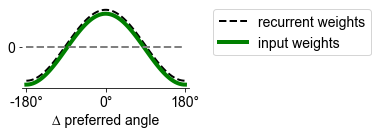

In [73]:
x = np.linspace(-180, 180, 100)
y = np.cos(x / 180 * np.pi)

fig = plt.figure(figsize=(3, 1.5))
plt.rc('font', **{'family': 'Arial', 'weight': 'normal', 'size': 14})
plt.plot(x, y+0.05, "k--", linewidth=2, alpha=1, label='recurrent weights')
plt.plot(x, y-0.06, "g-", linewidth=4, label='input weights')
plt.plot(x, x*0, "--", color="gray", linewidth=2)
plt.ylim(-1.15, 1.15)
plt.xlim(-190, 190)
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.yticks([0])
plt.xticks([-180, 0, 180])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%d°'))
plt.xlabel("∆ preferred angle")
plt.savefig('paper_figures/_functional_plot_notricks.pdf', bbox_inches='tight')

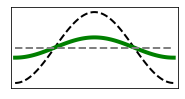

In [39]:
x = np.linspace(-180, 180, 100)
y = np.cos(x / 180 * np.pi)

fig = plt.figure(figsize=(3, 1.5))
plt.rc('font', **{'family': 'Arial', 'weight': 'normal', 'size': 14})
plt.plot(x, y, "k--", linewidth=2, alpha=1)
plt.plot(x, y/factor, "g-", linewidth=4)
plt.plot(x, x*0, "--", color="gray", linewidth=2)
plt.ylim(-1.15, 1.15)
plt.xlim(-190, 190)
plt.yticks([])
plt.xticks([])
plt.savefig('paper_figures/_functional_plot_structural.pdf', bbox_inches='tight')

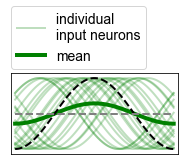

In [68]:
x = np.linspace(-180, 180, 100)
y = np.cos(x / 180 * np.pi)

fig = plt.figure(figsize=(3, 1.5))
plt.rc('font', **{'family': 'Arial', 'weight': 'normal', 'size': 14})
n_lines = 20
shifts = np.linspace(-120, 130, n_lines)+(np.random.rand(n_lines)-0.5)*2*120*0.08
plt.plot(x, np.cos((x+shifts[0]) / 180 * np.pi), "g-", linewidth=2, alpha=0.25, label="individual \ninput neurons")
for i in range(1, n_lines):
    plt.plot(x, np.cos((x+shifts[i]) / 180 * np.pi), "g-", linewidth=2, alpha=0.25)
plt.plot(x, y/factor, "g-", linewidth=4, label="mean")
plt.plot(x, y, "k--", linewidth=2)
plt.plot(x, x*0, "--", color="gray", linewidth=2)
plt.ylim(-1.15, 1.15)
plt.xlim(-190, 190)
plt.legend(bbox_to_anchor=(.85, 1.9))
plt.yticks([])
plt.xticks([])
plt.savefig('paper_figures/_functional_plot_functional_reshuffle.pdf', bbox_inches='tight')

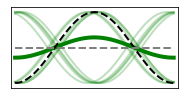

In [52]:
x = np.linspace(-180, 180, 100)
y = np.cos(x / 180 * np.pi)

fig = plt.figure(figsize=(3, 1.5))
plt.rc('font', **{'family': 'Arial', 'weight': 'normal', 'size': 14})
n_lines = 10
shifts = np.array([0, 180]*(n_lines//2))+(np.random.rand(n_lines)-0.5)*2*120*0.15
plt.plot(x, np.cos((x+shifts[0]) / 180 * np.pi), "g-", linewidth=2, alpha=0.25, label="individual \ninput neurons")
for i in range(1, n_lines):
    plt.plot(x, np.cos((x+shifts[i]) / 180 * np.pi), "g-", linewidth=2, alpha=0.25)
plt.plot(x, y/factor, "g-", linewidth=4, label="mean")
plt.plot(x, y, "k--", linewidth=2)
plt.plot(x, x*0, "--", color="gray", linewidth=2)
plt.ylim(-1.15, 1.15)
plt.xlim(-190, 190)
#plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.yticks([])
plt.xticks([])
plt.savefig('paper_figures/_functional_plot_functional_inversion.pdf', bbox_inches='tight')